### Problem Scenario: 
##### The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

### Problem Objective: 
#### As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs


### Data Description:
#### This dataset contains data from Spotify's API about all albums for the Rolling Stones listed on Spotify. It is important to note that all songs have unique IDs.


### Initial data inspection and data cleaning:
#### Check whether the data has duplicates, missing values, irrelevant (erroneous entries) values, or outliers.`

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv('rolling_stones_spotify.csv')

In [193]:
print(df.head())

   Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy 

In [194]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [195]:
print(df.describe())

        Unnamed: 0  track_number  acousticness  danceability       energy  \
count  1610.000000   1610.000000   1610.000000   1610.000000  1610.000000   
mean    804.500000      8.613665      0.250475      0.468860     0.792352   
std     464.911282      6.560220      0.227397      0.141775     0.179886   
min       0.000000      1.000000      0.000009      0.104000     0.141000   
25%     402.250000      4.000000      0.058350      0.362250     0.674000   
50%     804.500000      7.000000      0.183000      0.458000     0.848500   
75%    1206.750000     11.000000      0.403750      0.578000     0.945000   
max    1609.000000     47.000000      0.994000      0.887000     0.999000   

       instrumentalness    liveness     loudness  speechiness        tempo  \
count       1610.000000  1610.00000  1610.000000  1610.000000  1610.000000   
mean           0.164170     0.49173    -6.971615     0.069512   126.082033   
std            0.276249     0.34910     2.994003     0.051631    29.2334

In [196]:
duplicates = df[df.duplicated()]
print(f"There are {duplicates.shape[0]} duplicate rows.")

There are 0 duplicate rows.


In [197]:
if duplicates.shape[0] > 0:
    # Remove duplicates
    df = df.drop_duplicates()
    print("Duplicates removed.")

In [198]:
# Check for Nulls
print(df.isnull().sum()) 

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [199]:
df = df.dropna() 

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

In [202]:
excluded_column = 'track_number' # replace with your column name to exclude
numerical_columns = df.select_dtypes(include=['number']).columns.drop(excluded_column)
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f"{len(outliers)} outliers detected in column '{column}'")

0 outliers detected in column 'Unnamed: 0'
4 outliers detected in column 'acousticness'
0 outliers detected in column 'danceability'
8 outliers detected in column 'energy'
272 outliers detected in column 'instrumentalness'
0 outliers detected in column 'liveness'
14 outliers detected in column 'loudness'
92 outliers detected in column 'speechiness'
34 outliers detected in column 'tempo'
0 outliers detected in column 'valence'
48 outliers detected in column 'popularity'
76 outliers detected in column 'duration_ms'


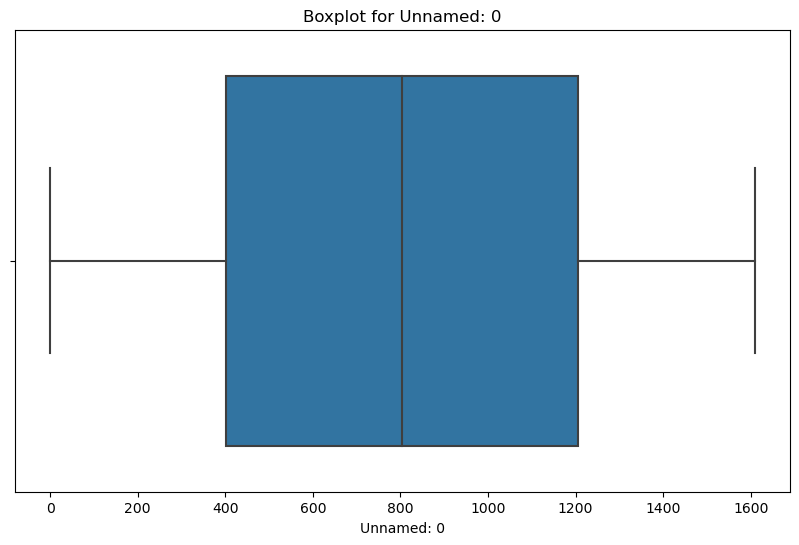

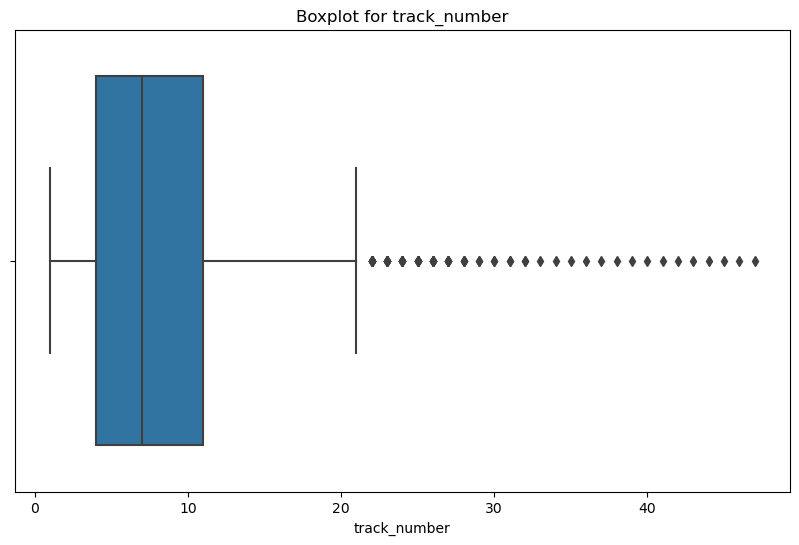

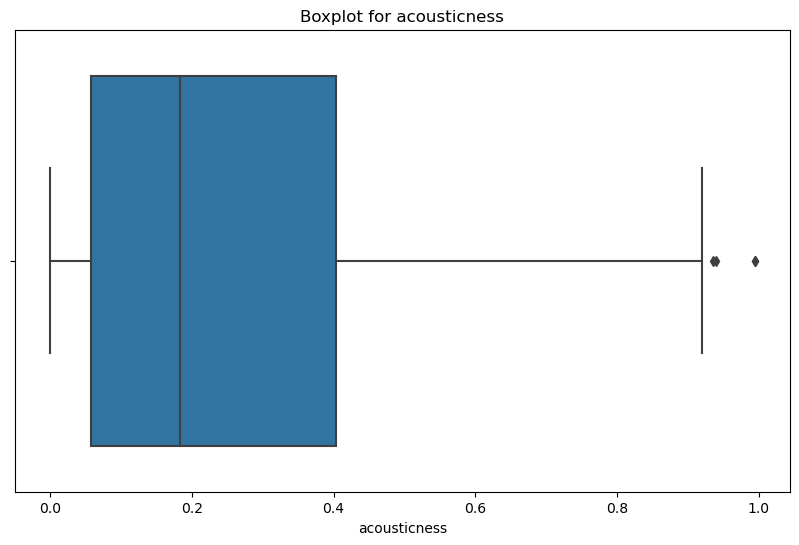

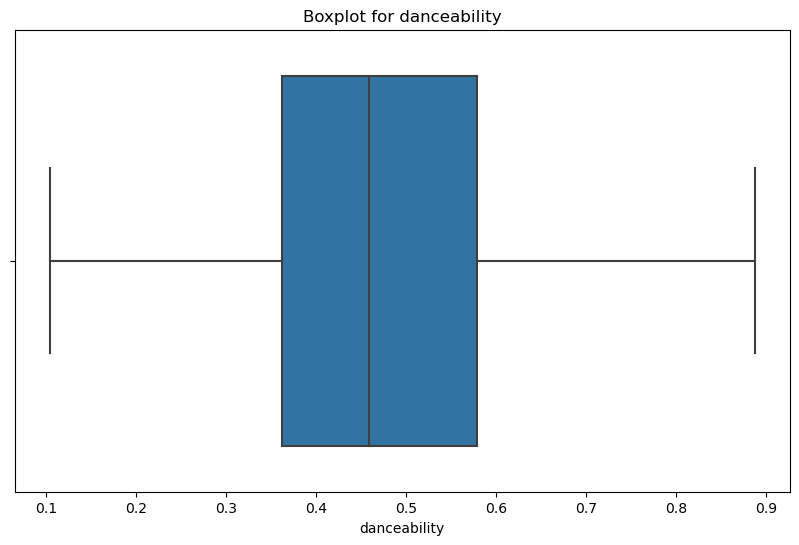

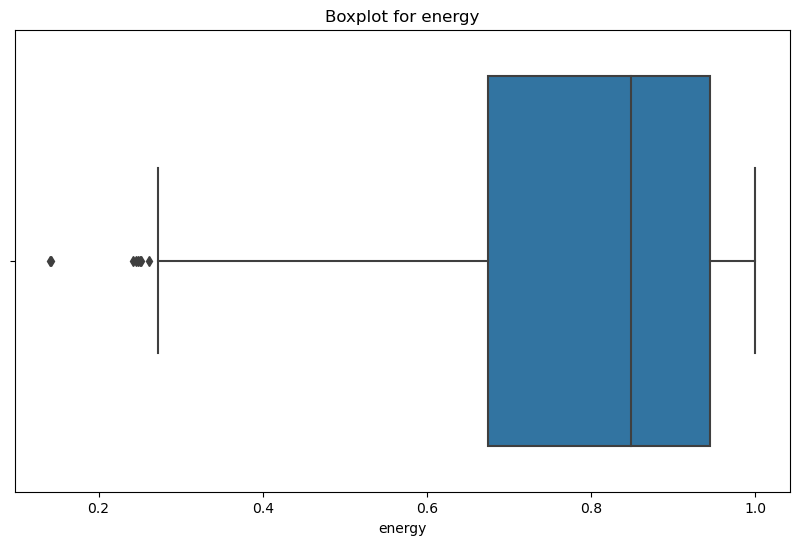

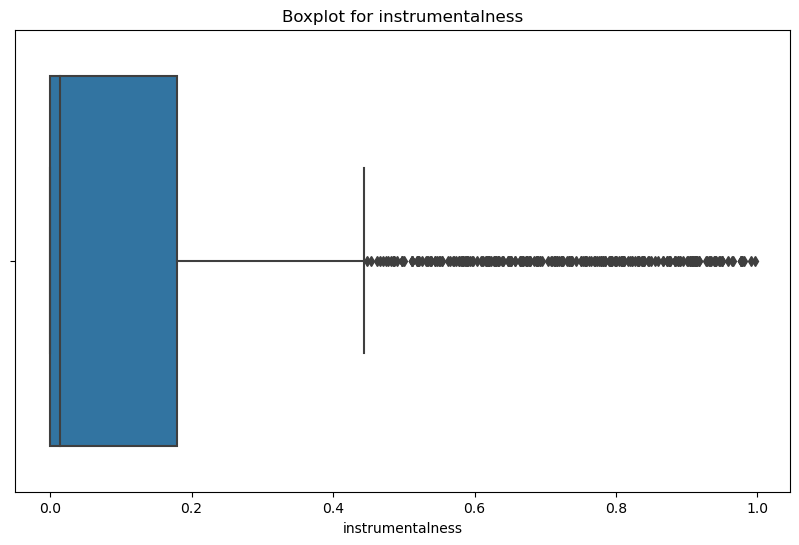

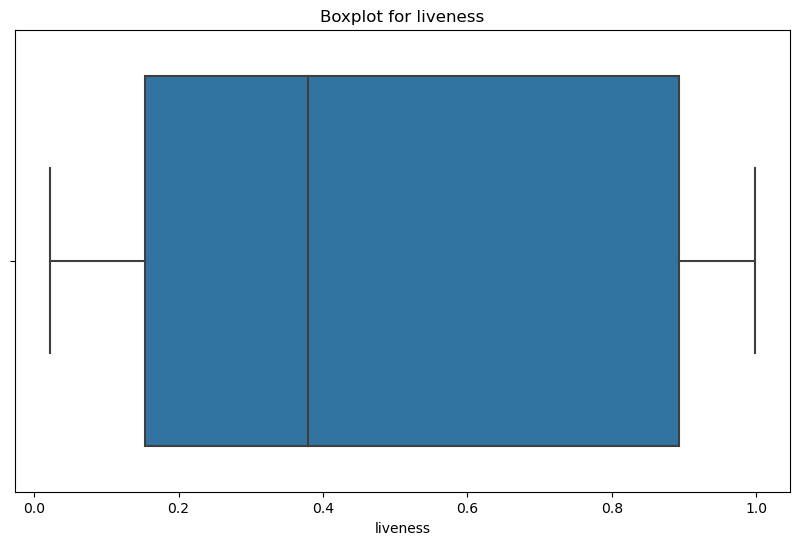

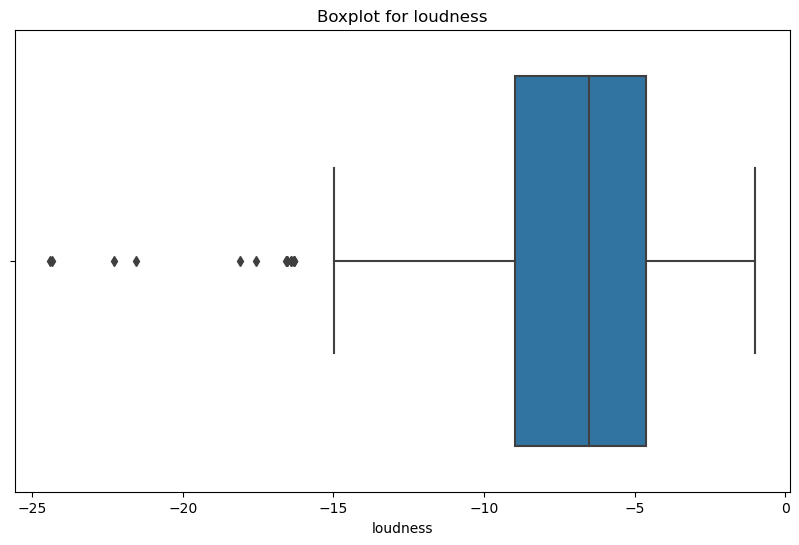

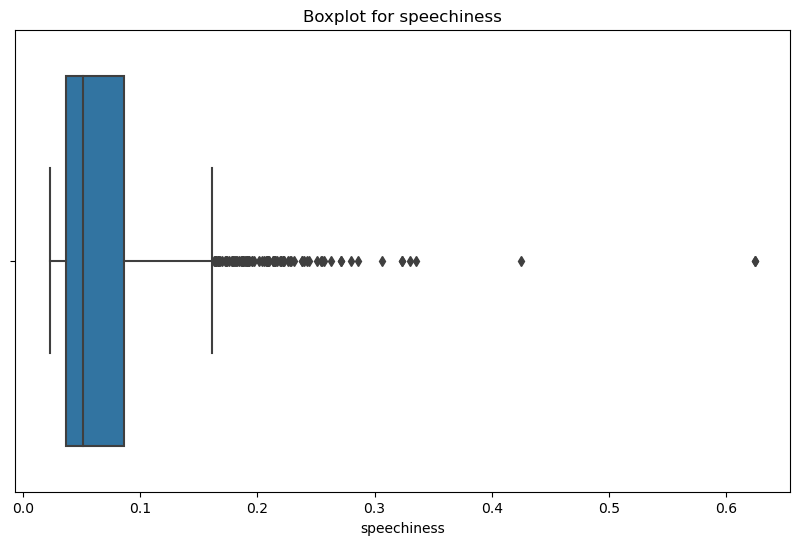

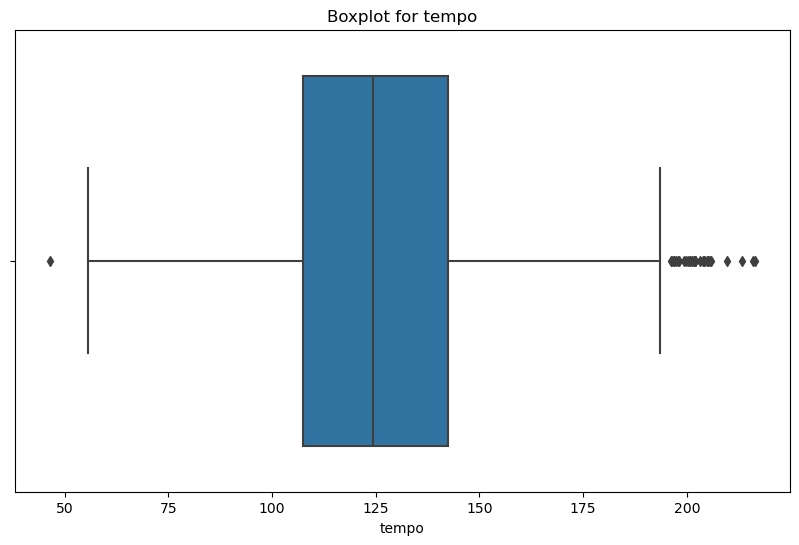

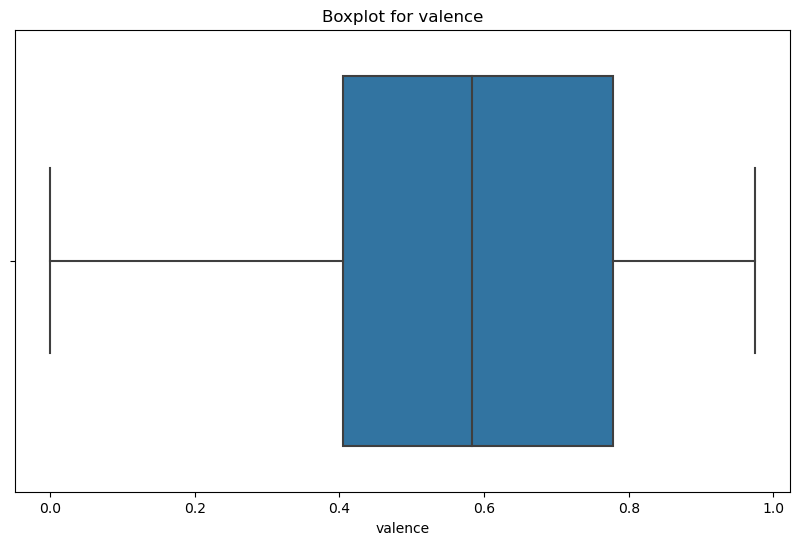

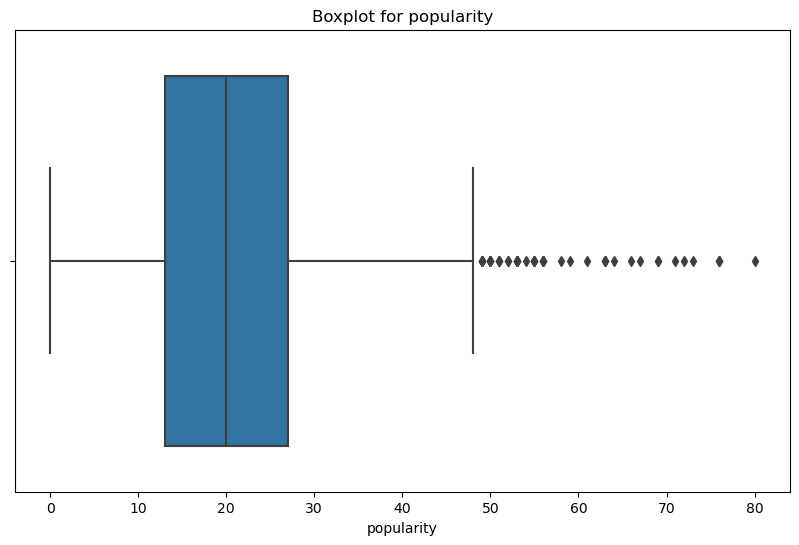

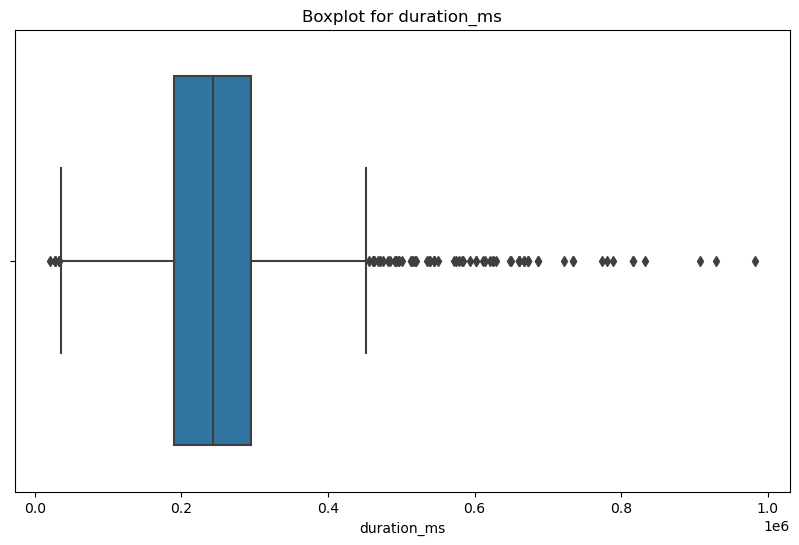

In [203]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

### Perform Exploratory Data Analysis and Feature Engineering:

#### Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.
#### Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.
#### Discover how a song's popularity relates to various factors and how this has changed over time.
#### Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.


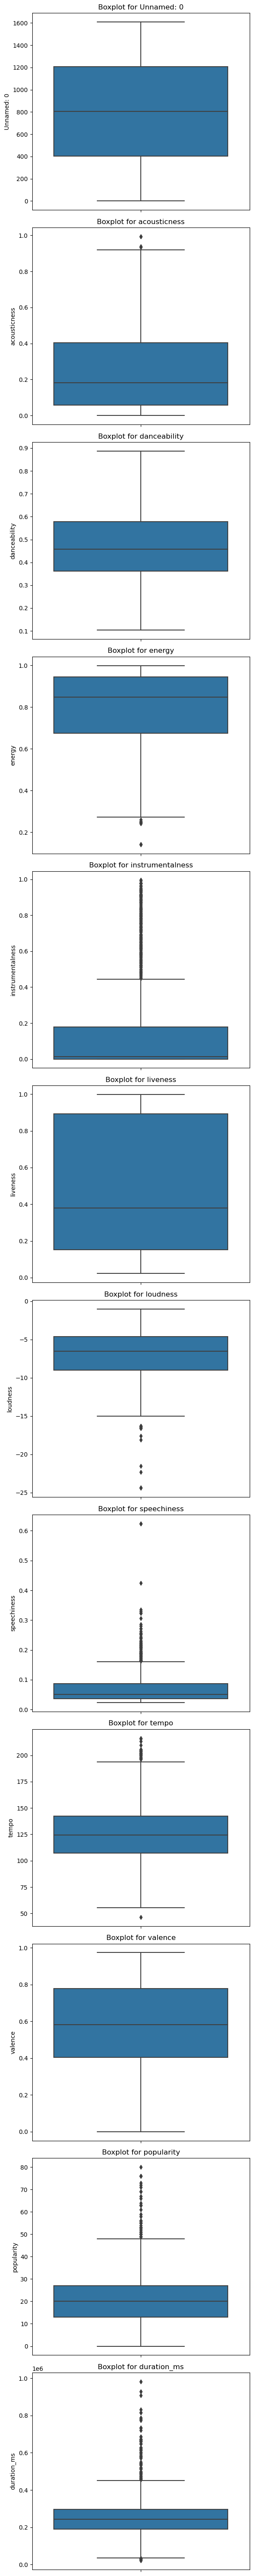

In [204]:
# Define the number of rows and columns for subplot grid
num_of_columns = len(numerical_columns)
n_cols = 1  # You can decide how many columns you want per row
n_rows = (num_of_columns + n_cols - 1) // n_cols

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten the array of axes for easy iterating
axs = axs.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axs[i])
    axs[i].set_title(f"Boxplot for {column}")

# If the number of numerical columns is not a multiple of n_cols, remove the extra subplots
for ax in axs[num_of_columns:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [205]:
#Total number of albums 
df['album'].nunique()

90

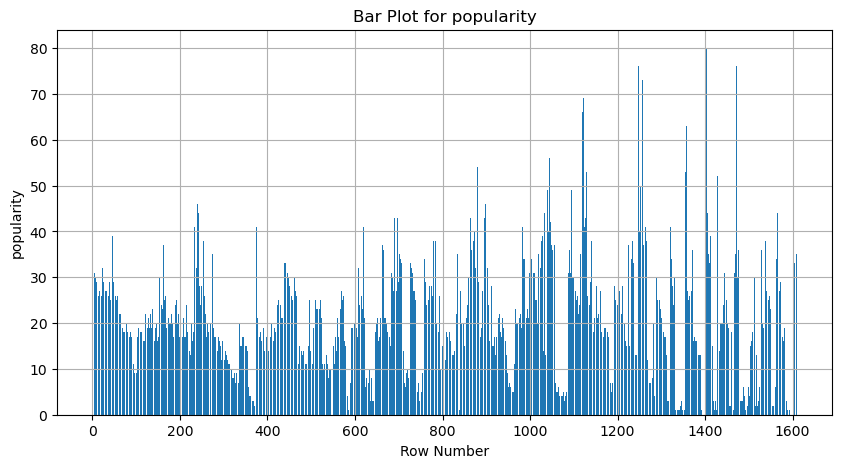

In [206]:
plt.figure(figsize=(10, 5))
plt.bar(df.index, df[selected_column])
plt.title(f"Bar Plot for {selected_column}")
plt.xlabel('Row Number')
plt.ylabel(selected_column)
plt.grid(True)
plt.show()

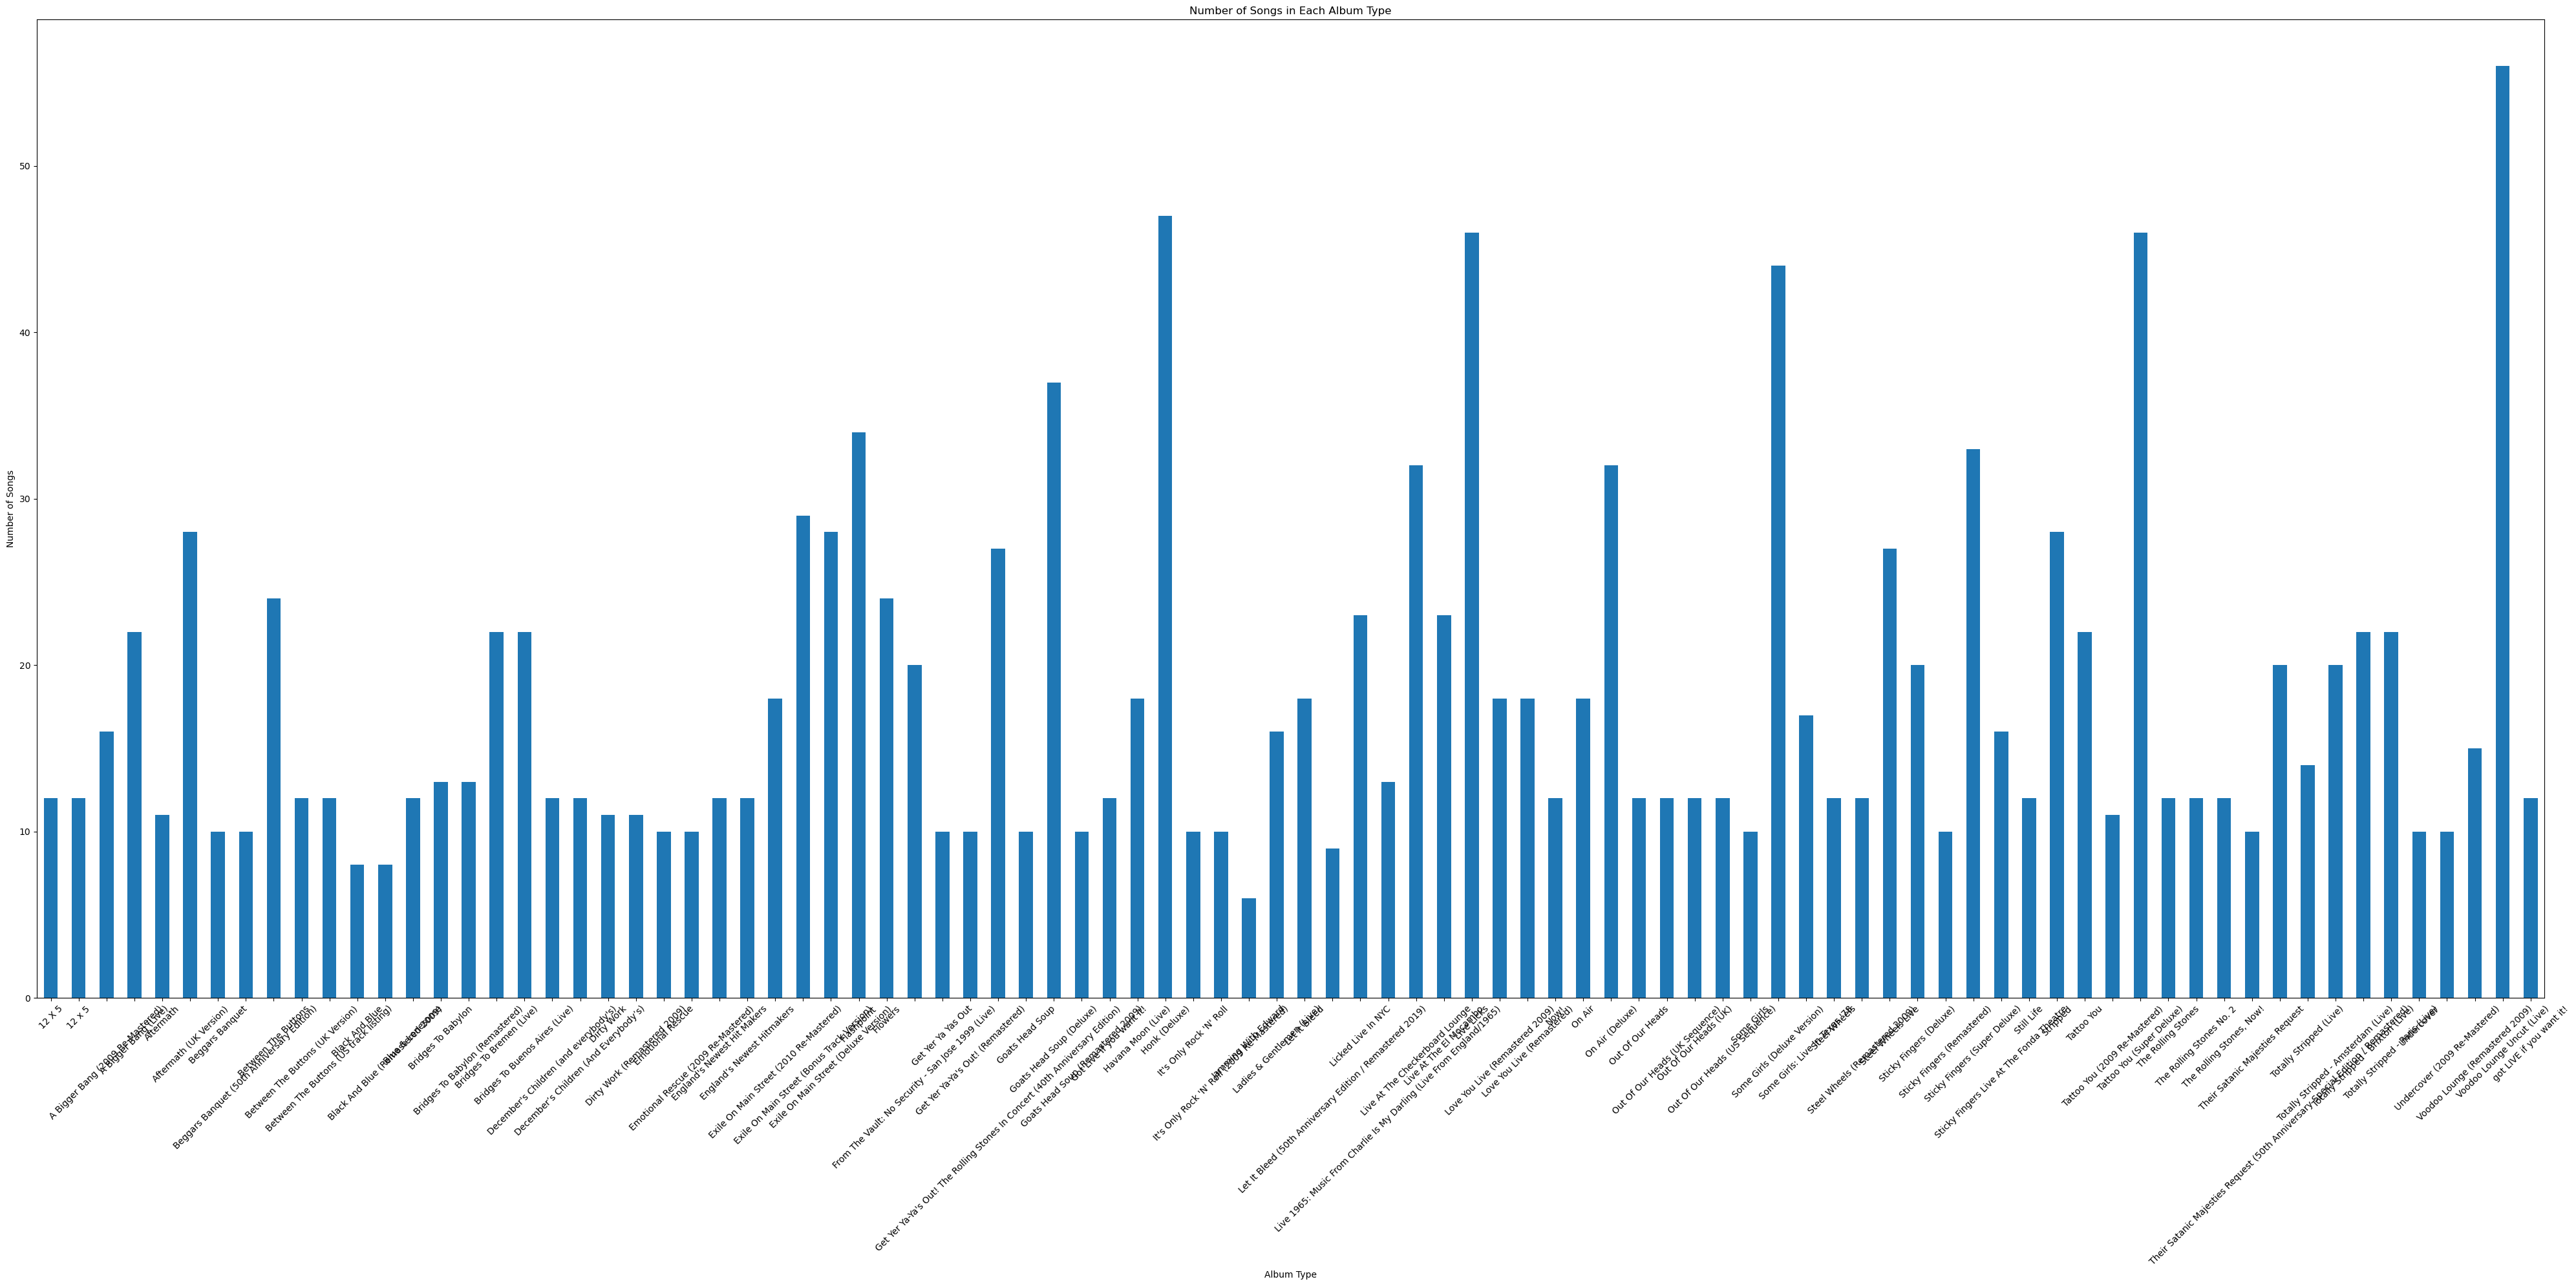

In [207]:
# Plot the results
song_counts.plot(kind='bar', figsize=(40, 20))  # You can adjust the figure size as needed
plt.xlabel('Album Type')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in Each Album Type')
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap

# Adjust the subplot parameters to give some more room for the x-axis labels.
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom to provide more space for x-axis labels

# Alternatively, if you need even more control, you could use:
# plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()  # Adjust layout
plt.show()

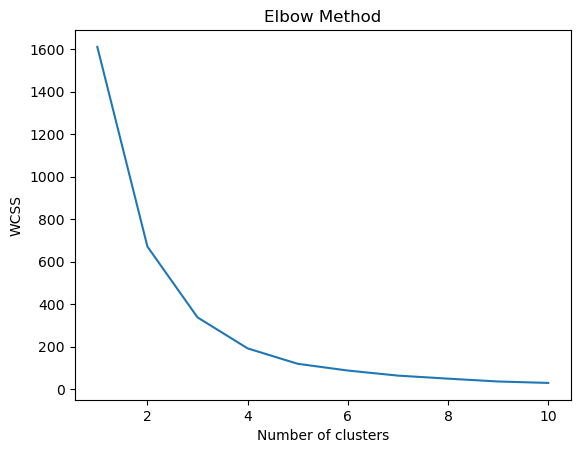

In [208]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df['popularity'].values.reshape(-1, 1)

# Scale the data to normalize it for the KMeans algorithm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the Elbow method to find a good number of clusters (if necessary)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


In [209]:
# Choose the number of clusters based on your elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Sort cluster centers and take the smallest value of the highest cluster as the threshold
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_sorted = np.sort(cluster_centers.squeeze())

# Assuming the last cluster center represents the most 'popular' cluster
# The threshold is the lower boundary of the most popular cluster
popularity_threshold = cluster_centers_sorted[-1]

# Applying the threshold to the dataset to label songs as popular or not
df['is_popular'] = df['popularity'] >= popularity_threshold

print(f"The popularity threshold is set at: {popularity_threshold}")

# Proceed with aggregating and recommending albums as previously mentioned

The popularity threshold is set at: 42.68122270742357


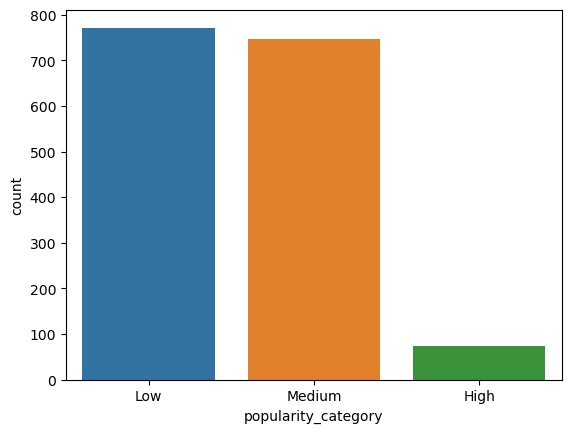

In [210]:
# This would depend on having categorical data.
# Let's assume you categorized 'popularity' into 'Low', 'Medium', 'High'
# df['popularity_category'] = pd.cut(df['popularity'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])

# Bar chart
df['popularity_category'] = pd.cut(df['popularity'], bins=[0, 19, 43, 100], labels=['Low', 'Medium', 'High'])
sns.countplot(x='popularity_category', data=df)
plt.show()

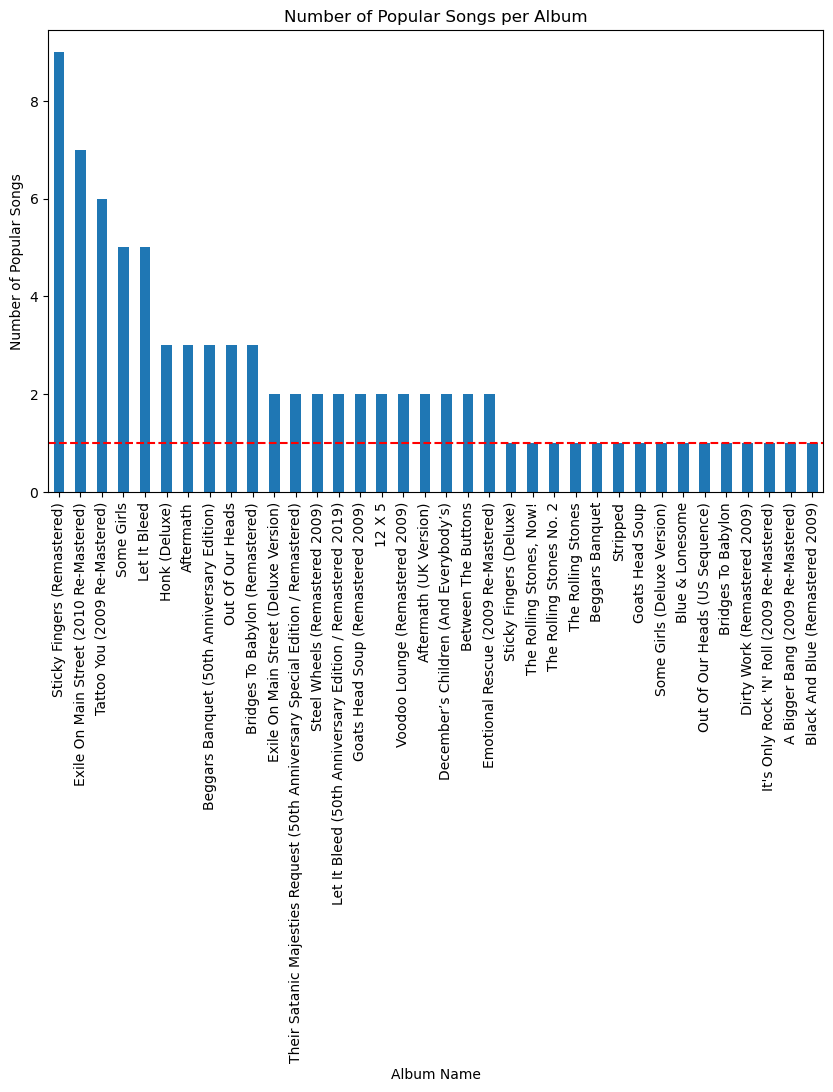

The top two albums recommended are: ['Sticky Fingers (Remastered)', 'Exile On Main Street (2010 Re-Mastered)']


In [211]:

# Aggregating data to count popular songs in each album
popular_songs_per_album = df[df['popularity'] > popularity_threshold].groupby('album').size()

# Sort the albums by the count of popular songs
sorted_albums = popular_songs_per_album.sort_values(ascending=False)

# Select the top two albums
top_two_albums = sorted_albums.head(2)

# Plotting the results
plt.figure(figsize=(10, 6))
sorted_albums.plot(kind='bar')
plt.title('Number of Popular Songs per Album')
plt.xlabel('Album Name')
plt.ylabel('Number of Popular Songs')
plt.axhline(y=1, color='r', linestyle='--')  # This assumes at least 2 popular songs to be significant
plt.show()

print(f"The top two albums recommended are: {top_two_albums.index.tolist()}")

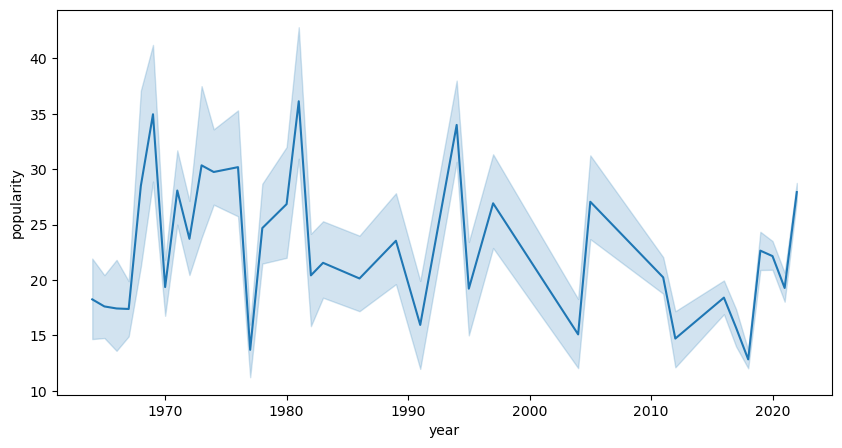

In [212]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year (and other time units if needed)
df['year'] = df['release_date'].dt.year

# Plotting trends over years
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='popularity', data=df)
plt.show()


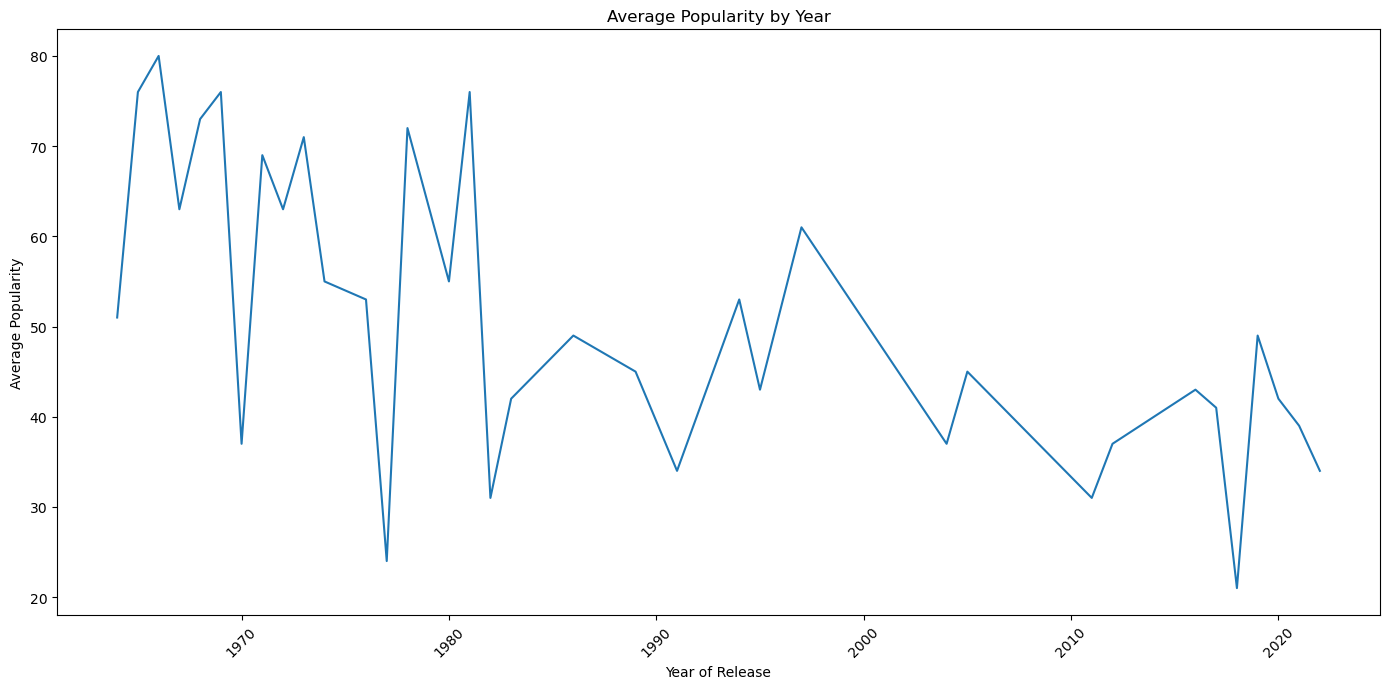

In [213]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year
df['year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month

# Group by year and calculate mean popularity
yearly_popularity = df.groupby('year')['popularity'].max().reset_index()

# Plotting the trend of popularity over years
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='popularity', data=yearly_popularity)
plt.title('Average Popularity by Year')
plt.xlabel('Year of Release')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()

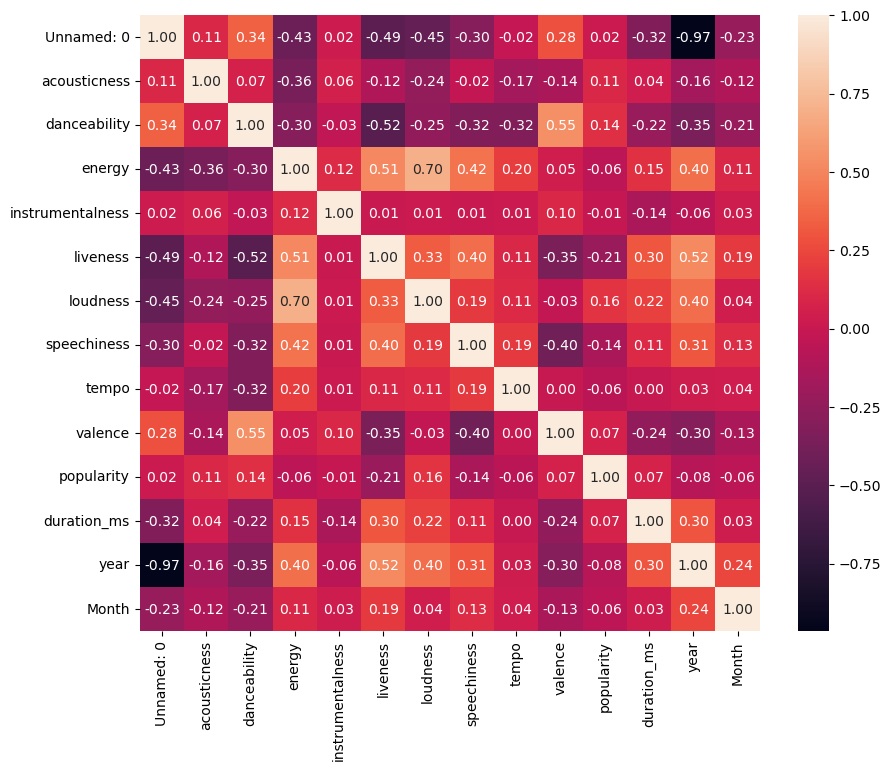

In [215]:
plt.figure(figsize=(10, 8))
excluded_column = 'track_number' # replace with your column name to exclude
numerical_columns = df.select_dtypes(include=['number']).columns.drop(excluded_column)
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

### Notes from the correlation Heatmap
#### Valenc and Dancebility have significantly +ve  corr
#### Danceablity is -vely corr with liveness
#### Liveness and Year of Release have significantly +ve  corr
#### Some other features which are +vely corr with year of release are : energy, loudness, speechiness and duration of song
#### Loudness and Energy have significantly +ve  corr
#### Energy is also +vely corr with loudness, speechiness and a little bit with tempo
#### Factors affecting popularity with some +ve Corr are : acousticness, danceablity, loudness and valence. 
#### Factors affecting popularity with some -ve Corr are : liveness and speechiness. 

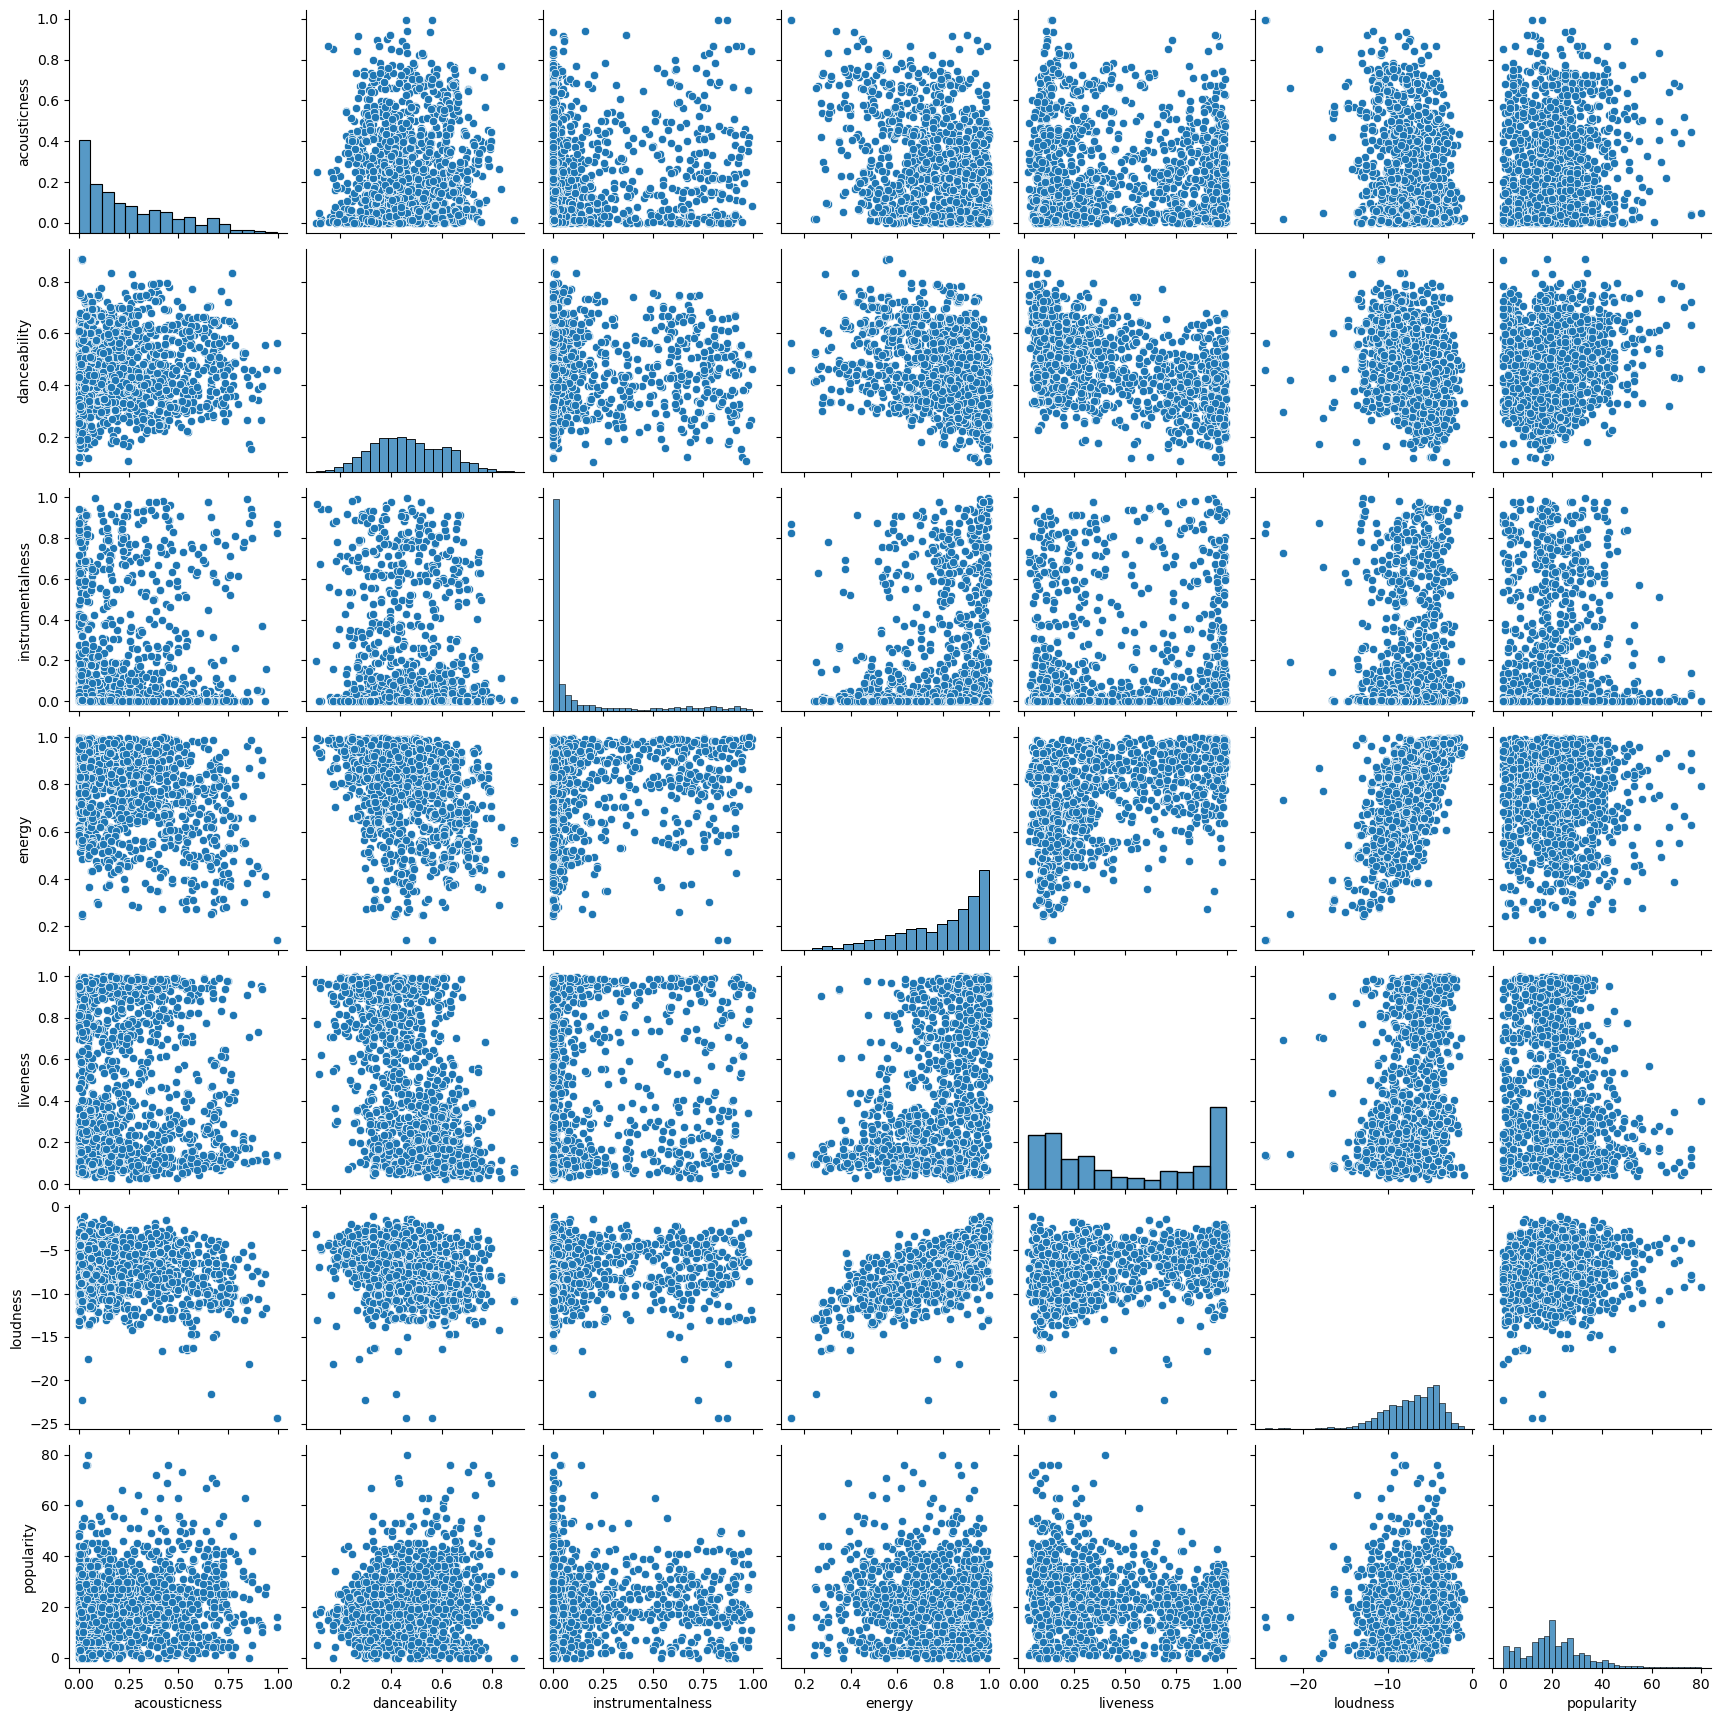

In [219]:
# Pairwise scatter plots for selected features
sns.pairplot(df[['acousticness', 'danceability', 'instrumentalness', 'energy', 'liveness', 'loudness', 'popularity']])
plt.show()

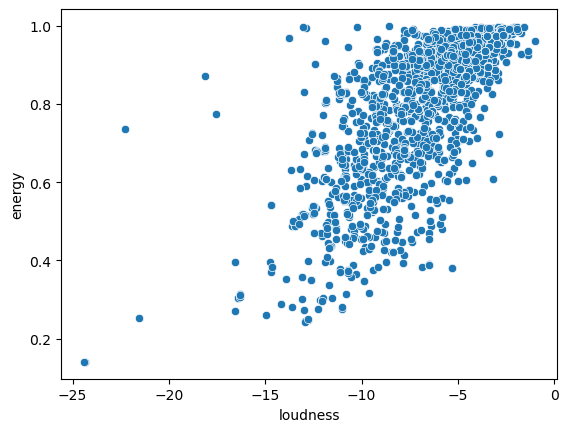

In [220]:
sns.scatterplot(x='loudness', y='energy', data=df)
plt.show()

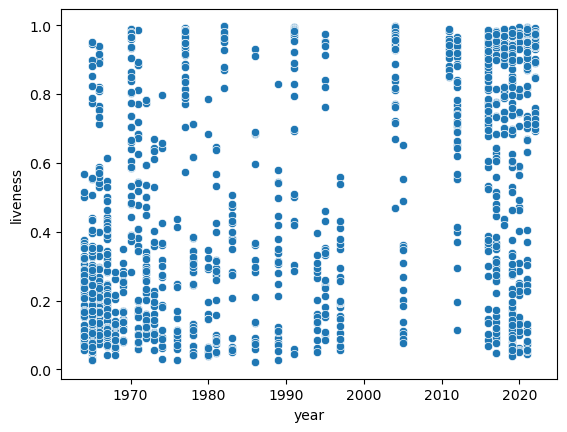

In [237]:
sns.scatterplot(x='year', y='liveness', data=df)
plt.show()

#### We see that as songs have higher energy their loudness also follows and vice-versa
#### +ve Correlation between loudness and energy can be observed here

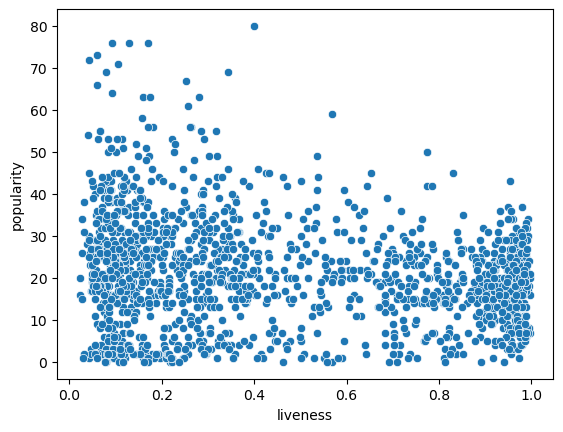

In [221]:
sns.scatterplot(x='liveness', y='popularity', data=df)
plt.show()

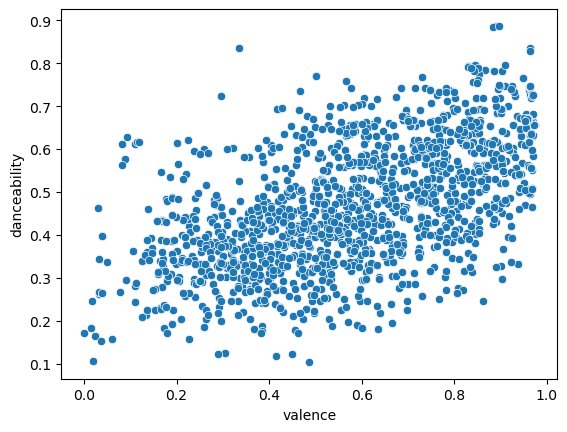

In [238]:
sns.scatterplot(x='valence', y='danceability', data=df)
plt.show()

#### Some +ve correlation can be obsered in the scatter plot of valence and danceability

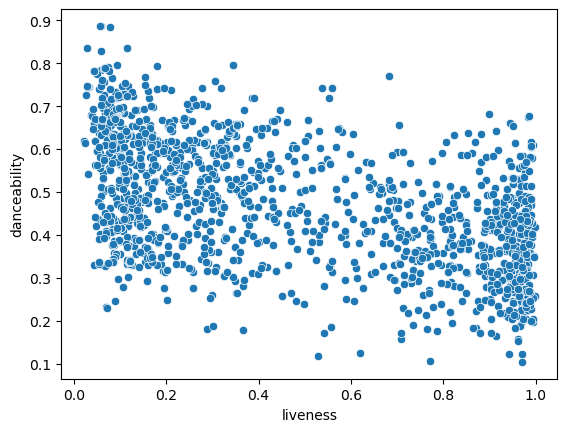

In [239]:
sns.scatterplot(x='liveness', y='danceability', data=df)
plt.show()

#### Some negative correlation can be obsered in the scatter plot of liveness and danceability

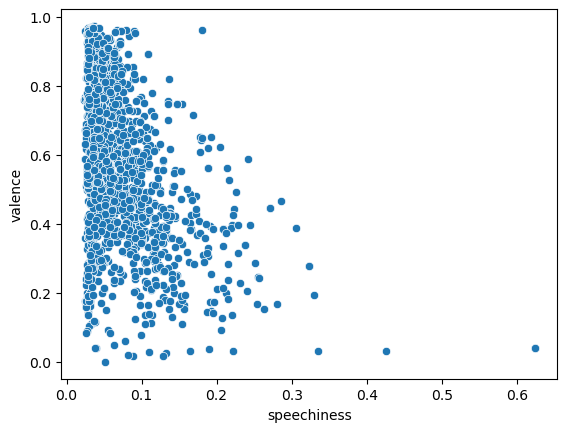

In [240]:
sns.scatterplot(x='speechiness', y='valence', data=df)
plt.show()

#### Some negative correlation can be obsered in the scatter plot of speechiness and valence

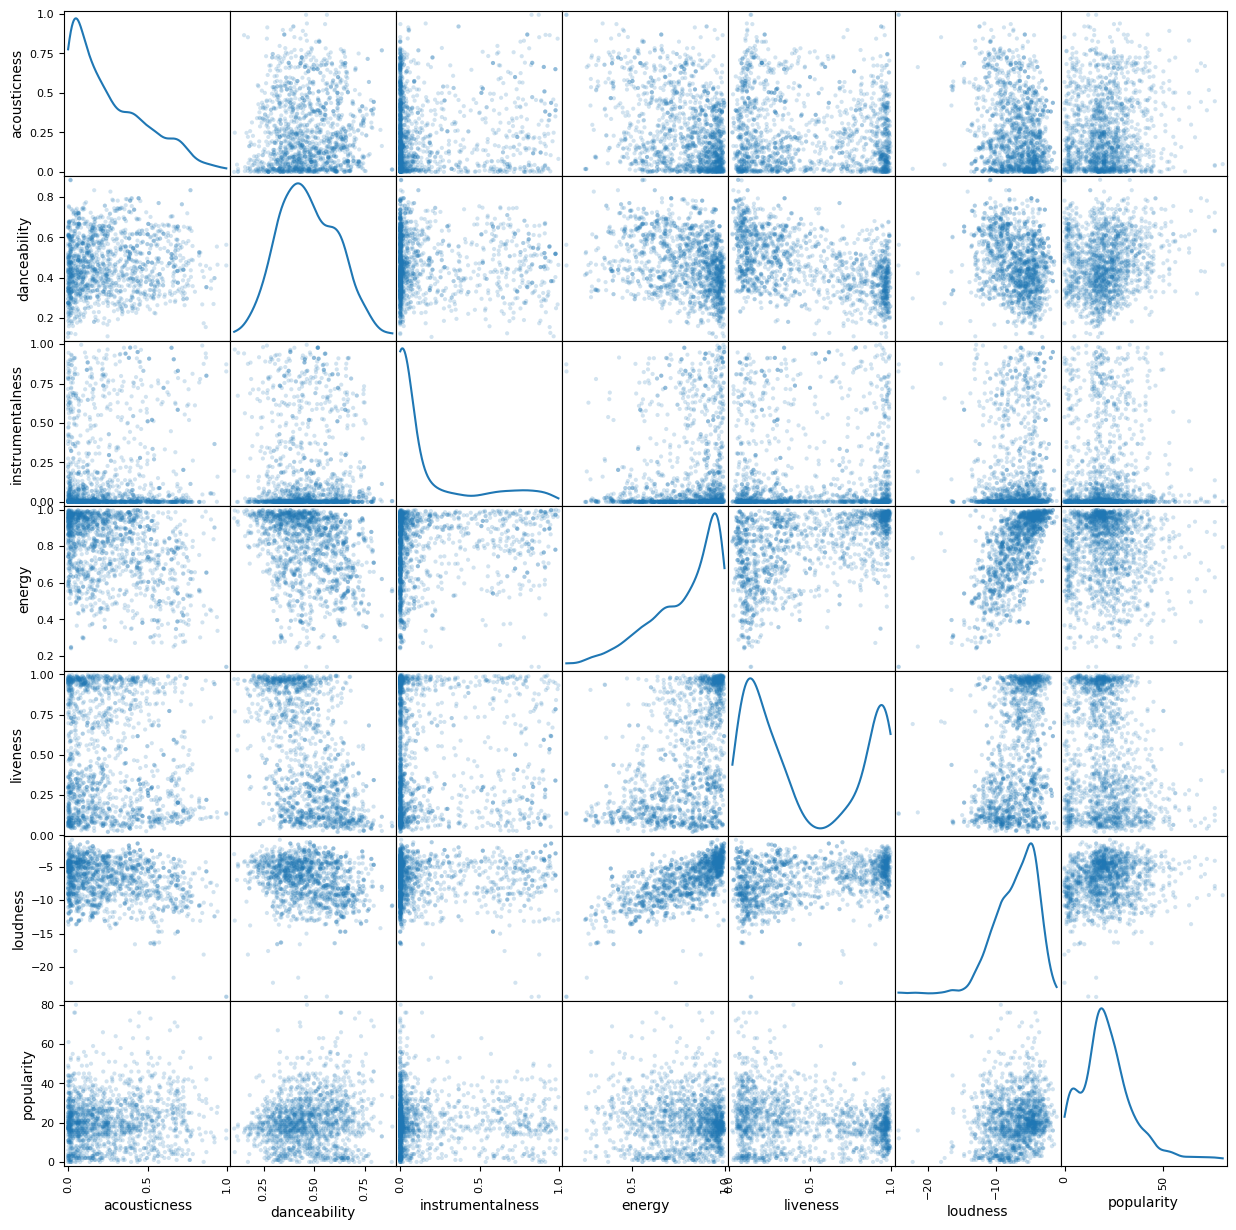

In [223]:
from pandas.plotting import scatter_matrix

# Scatter matrix of several columns
scatter_matrix(df[['acousticness', 'danceability', 'instrumentalness', 'energy', 'liveness', 'loudness', 'popularity']], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

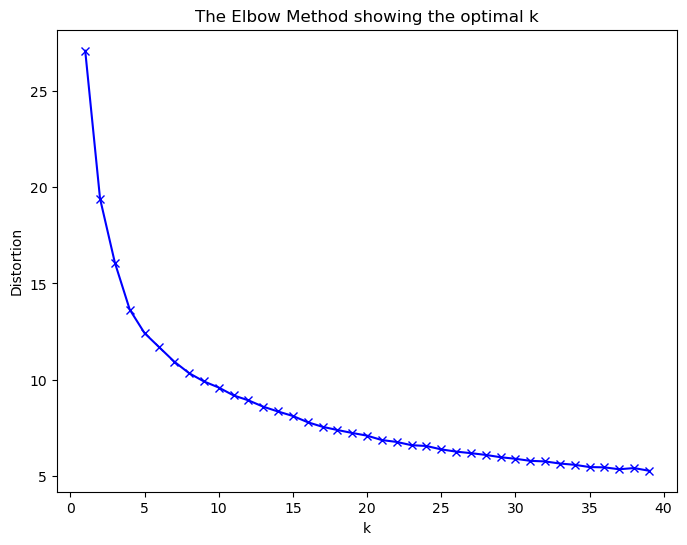

In [232]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Elbow method to find optimal number of clusters
X = df[['acousticness', 'danceability', 'energy', 'liveness', 'loudness','speechiness','tempo','valence','popularity']].dropna()
distortions = []
K = range(1, 40)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Elbow is somewhere between 5-10 clusters 

R^2 Score: 0.045326672788612576


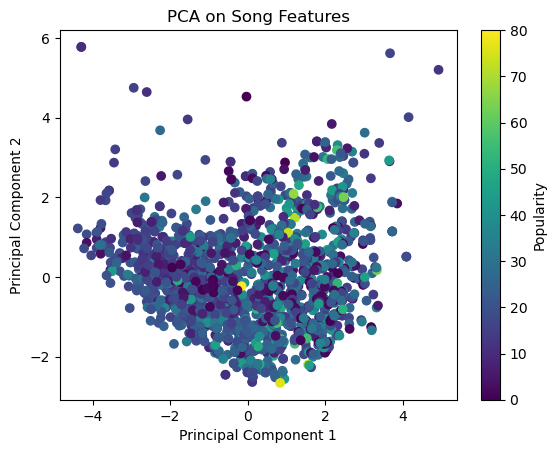

In [235]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Exploratory Data Analysis
# Calculate correlation matrix
correlation_matrix = df.corr()
popularity_correlation = correlation_matrix['popularity'].sort_values()

# Dimensionality Reduction with PCA
features = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_pca = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Combine with popularity for modeling
df_pca['popularity'] = df['popularity']

# Modeling with Linear Regression
X = df_pca.drop('popularity', axis=1)
y = df_pca['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'R^2 Score: {r2_score(y_test, predictions)}')

# Time Analysis
# ... (analyze how model coefficients change over time or how feature importance changes)

# Visualization
plt.scatter(df_pca['principal_component_1'], df_pca['principal_component_2'], c=df_pca['popularity'])
plt.colorbar().set_label('Popularity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Song Features')
plt.show()

# Interpretation
# Discuss findings, the effect of features on popularity, the importance of dimensionality reduction, and any temporal trends observed.
